### Braden Anderson
### Sales Predictions Project
### Coding Dojo
### Data Science and Machine Learning Bootcamp

Goal: Understand the properties of products and outlets that play crucial roles in increasing sales.

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import missingno
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

%matplotlib inline

In [131]:
# Importing the sales data from a csv file to the sales_df data frame.
filename = '/content/drive/MyDrive/Programming/Colab Notebooks/Coding_Dojo/Sales_Project/sales_predictions.csv'

sales_df = pd.read_csv(filename)

In [132]:
# View the first five rows of the data.
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [133]:
# Check if any of the rows are duplicates of eachother. False indicates no rows are duplicates.
sales_df.duplicated().any()

False

### Finding and visualizing missing values in the dataset

In [134]:
# .info() shows that the Item_Weight and Outlet_Size columns have some null values.
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [135]:
# Notice that "Low Fat", "LF", and "low fat" are three different inputs trying to say the same thing.
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [136]:
# change any "LF"'s or "low fat"'s to "Low Fat"
sales_df.loc[(sales_df['Item_Fat_Content'] == 'LF') | (sales_df['Item_Fat_Content'] == 'low fat'), 'Item_Fat_Content'] = 'Low Fat'


In [137]:
# Verify that we only have a single category now representing Low Fat content
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [138]:
# Check for the total number of missing values in each column.
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [139]:
# Total number of missing values in the entire data frame.
sales_df.isnull().sum().sum()

3873

In [140]:
# View only the rows where Item_Weight column has a NaN value.
sales_df.loc[sales_df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


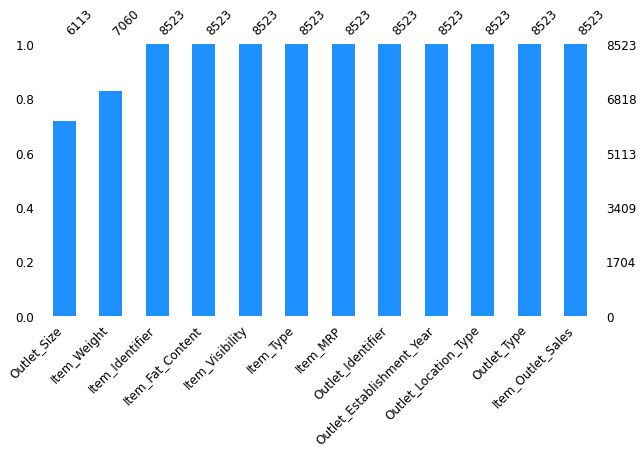

In [141]:
# Create a bar graph to get a visual of the frequency of NaN values in the various columns.
missingno.bar(sales_df, color="dodgerblue", figsize=(10,5), fontsize=12, sort="ascending")

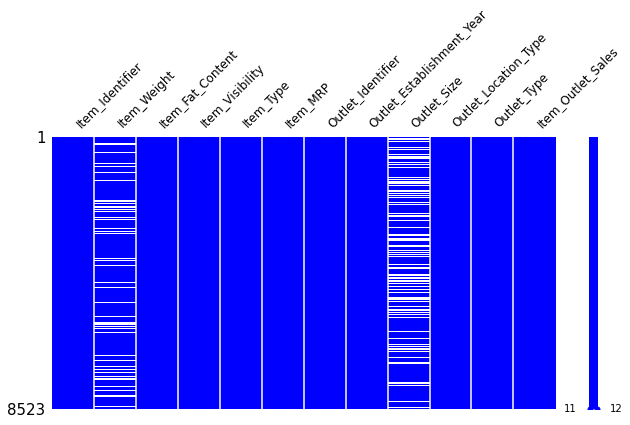

In [142]:
# Create a high level view of where the NaN values occur relative to eachother.
missingno.matrix(sales_df, color=(0,0,1), figsize=(10,5), fontsize=12)

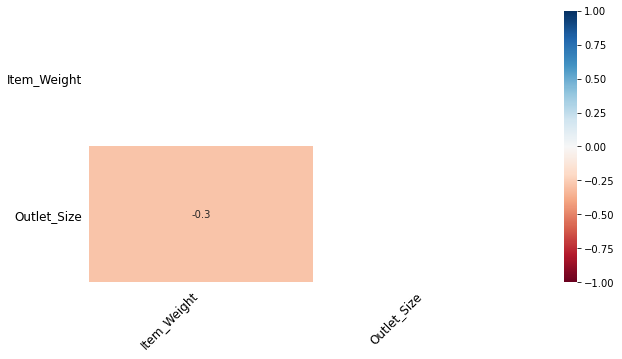

In [143]:
# Create a heat map showing how the missing values in Outlet_Size column correlate to missing values in Item_weight column.
missingno.heatmap(sales_df, figsize=(10,5), fontsize=12)

### Imputing the missing values

In [144]:
# Impute missing values in the 'Outlet_Size' column with the value 'missing'. This essentially adds a new class to the 'Outlet_Size' feature that the ML model can then learn. 
categorical_imputer = SimpleImputer(strategy='constant', fill_value='missing', add_indicator = True)
sales_df['Outlet_Size'] = categorical_imputer.fit_transform(sales_df[['Outlet_Size']])


In [145]:
# Impute missing values in the 'Item_Weight' column using the mean of the other weights. 
numerical_imputer = SimpleImputer(add_indicator=True)
sales_df['Item_Weight'] = numerical_imputer.fit_transform(sales_df[['Item_Weight']])

In [146]:
# Verify that after imputing, the data frame no longer has any missing values. 
sales_df.isnull().sum().sum()

0

### Summary Statistics

In [148]:
# Summary statistics for the numerical data.
sales_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [149]:
# Summary statistics for the categorical data.
sales_df.describe(include=[object])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,3,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


In [150]:
# List of unique years that these outlets were established.
sales_df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [151]:
# A detailed look at sales by item type. 
sales_df.groupby(by="Item_Type")[['Item_Outlet_Sales']].agg([max, min, np.mean, np.median])

Item_Outlet_Sales                                  
                                    max       min         mean     median
Item_Type                                                                
Baking Goods                  7931.6754   37.2848  1952.971207  1577.9460
Breads                        8958.3390   35.2874  2204.132226  1860.2452
Breakfast                     8209.3140   39.9480  2111.808651  1554.6430
Canned                       10306.5840   37.9506  2225.194904  1860.2452
Dairy                        10256.6490   40.6138  2232.542597  1650.8511
Frozen Foods                  9678.0688   36.6190  2132.867744  1687.1372
Fruits and Vegetables        12117.5600   45.2744  2289.009592  1830.9500
Hard Drinks                   7843.1240   37.9506  2139.221622  1816.6353
Health and Hygiene            9779.9362   34.6216  2010.000265  1669.4935
Household                    13086.9648   33.2900  2258.784300  1981.4208
Meat                          9390.4432   47.9376  2158.977911  1829.6184
Others                        6008.8450   39.9480  1926.139702  1713.7692
Seafood                       6503.5344  149.8050  2326.065928  2055.3246
Snack Foods                  10993.6896   33.9558  2277.321739  1944.1360
Soft Drinks                   9554.2300   33.2900  2006.511735  1518.0240
Starchy Foods                 8132.0812   58.5904  2374.332773  1968.1048

In [152]:
# Same detailed look at Item_Outlet_Sales as above, however now items are sorted by their maximum sales value. 
# A similar table could be made to sort by any desired statistic. 
grouped_sales = sales_df.groupby(by="Item_Type")[['Item_Outlet_Sales']].agg([max, min, np.mean, np.median])
grouped_sales.sort_values(by=[('Item_Outlet_Sales',    'max')], ascending=False)

Item_Outlet_Sales                                  
                                    max       min         mean     median
Item_Type                                                                
Household                    13086.9648   33.2900  2258.784300  1981.4208
Fruits and Vegetables        12117.5600   45.2744  2289.009592  1830.9500
Snack Foods                  10993.6896   33.9558  2277.321739  1944.1360
Canned                       10306.5840   37.9506  2225.194904  1860.2452
Dairy                        10256.6490   40.6138  2232.542597  1650.8511
Health and Hygiene            9779.9362   34.6216  2010.000265  1669.4935
Frozen Foods                  9678.0688   36.6190  2132.867744  1687.1372
Soft Drinks                   9554.2300   33.2900  2006.511735  1518.0240
Meat                          9390.4432   47.9376  2158.977911  1829.6184
Breads                        8958.3390   35.2874  2204.132226  1860.2452
Breakfast                     8209.3140   39.9480  2111.808651  1554.6430
Starchy Foods                 8132.0812   58.5904  2374.332773  1968.1048
Baking Goods                  7931.6754   37.2848  1952.971207  1577.9460
Hard Drinks                   7843.1240   37.9506  2139.221622  1816.6353
Seafood                       6503.5344  149.8050  2326.065928  2055.3246
Others                        6008.8450   39.9480  1926.139702  1713.7692